### 首先了解一下Monte Carlo Method 蒙特卡洛方法

#### 1、什么是蒙特卡洛方法

它是一种以概率统计理论为指导的数值计算方法。

###### 是一类方法的统称！

再说一点，为什么要采样：采样的目的是评估一个函数在某个分布上的期望值！
常用于计算一些非常复杂无法直接求解的函数期望。

#### 应用

1、求定积分

<img src="图片/积分.png">

目标：求定积分$\int^{b}_{a}{f(x)dx}$

方法：当我们在[a,b]之间随机取一点x时，它对应的函数值就是f(x)。接下来我们就可以用f(x) * (b - a)来粗略估计曲线下方的面积，也就是我们需要求的积分值，当然这种估计（或近似）是非常粗略的。 

多采样几次：
<img src="图片/采样.png">

在此图中，做了四次随机采样，得到了四个随机样本$x1,x2,x3,x4x1,x2,x3,x4$，

并且得到了这四个样本的$f(xi)f(xi)$的值分别为$f(x1),f(x2),f(x3),f(x4)f(x1),f(x2),f(x3),f(x4)$。

对于这四个样本，每个样本能求一个近似的面积值，大小为$f(xi)∗(b−a)f(xi)∗(b−a)$。

为什么能这么干么？

对照图下面那部分很容易理解，每个样本都是对原函数f的近似，
所以我们认为$f(x)$的值一直都等于$f(xi)$。

$\color{red}{虽然上面的方法可以一定程度上求解出近似的解}$

$\color{red}{但是它隐含了一个假定，即x在[a,b]之间是均匀分布的，而绝大部分情况，}$

$\color{red}{x在[a,b]之间不是均匀分布的。如果我们用上面的方法，}$

$\color{red}{则模拟求出的结果很可能和真实值相差甚远。}$

$\color{blue}{啥意思？ 也就是说，如果采样点是服从p(x)分布，那我们采样也要尽可能的安照p(x)分布去采样}$

#### 更一般的情况，如果我们的采样是带有概率的呢？

现在我们考虑要求的被积函数是：$I = \int^{b}_{a}{g(x)dx}$

且每次采样都是服从一定的概率$f_X(x)$去采样。

实际上，上面的例子可以认为每次采样都是等概率 $\frac{1}{b-a}$，服从均匀分布

我们看下，此时$g(x)$中的这个$x$是不是就可以理解为条件概率啊！！！！！！ 对吧

$p_{g(x_i)} = p_{f_X(x_i)}*p_{g^*_{x_i}}$

所以：$g(x) = g^*_{x}*f_X(x)$

$p_{f_X(x_i)}$ 是采样$x_i$的概率，

$p_{g^*_{x_i}}$ 则可以立即为是$g^*_{x_i}$本身的概率。

所以上面的定积分就可以认为是一个函数的期望问题！！！ 

不过这个函数并不是$g(x)$，而是$g^*(x)$, 因为$g(x)$相当于是一个条件概率了。


$I = \int^{b}_{a}{g^*(x)*f_X(x_i)dx}$  这就是求函数$g^*(x)$基于概率分布$f_X(x_i)$的函数期望。

当然$\int^{b}_{a}{f_X(x)}dx=1$

ok！！！

所以我们的目标（定积分）：
1. 产生服从分布律FX的随机变量$X_i(i=1,2,⋯,N)$
2. 计算均值 
$\overline{I} = \frac{1}{N}\sum_{i=1}^{N}{g^*(X_i)} = \frac{1}{N}\sum_{i=1}^{N}{\frac{g_{(x)}}{f_X(x)}}$

#### 实际上下面的几个随机分布采样都可以认为是蒙特卡洛采样方法! 
#### 2、概率分布采样

上面一节，我们已经能知道了蒙特卡洛方法的关键是得到x的概率分布。

如果求出了x的概率分布，我们可以基于概率分布去采样基于这个概率分布的N个x的样本集，

带入蒙特卡洛积分式子（也就是个求和）即可求解。

###### 但是还有一个关键的问题需要解决，即如何基于概率分布去采样基于这个概率分布的N个x的样本集。　

先来个简单的，假设概率分布（也叫cdf）$P(x)$已知，概率密度函数（pdf）是$f(x)$

举个例子： 标准正太分布采样：

如果随机变量U1和U2是IID独立同分布，且U1,U2∼Uniform[0,1]那么有 标准正太分布的反函数:

$Z_0 = \sqrt{-2ln(U_1)}*cos(2πU2)$

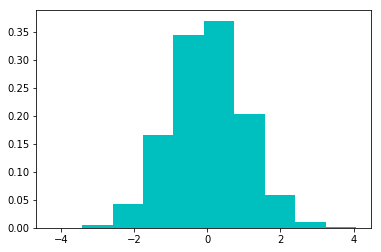

Wall time: 3.86 s


In [9]:
%%time
import numpy as np
import matplotlib.pyplot as plt

def sample():
    u1 = np.random.rand()
    u2 = np.random.rand()
    
    z0 = np.sqrt(-2*np.log(u1)) * np.cos(2*np.pi*u2)
    
    return z0

n = 100000
samples = []

for i in range(n):
    samples.append(sample())
y = np.reshape(samples, n, 1)
plt.hist(y, normed=1, fc='c')  # 采样的直方图

x = np.arange(-4, 4, 0.1) 
plt.plot(x, 1/np.sqrt(2 * np.pi) * np.exp(-0.5 * x ** 2), 'g', lw=6)   # 标准正态分布 
plt.show()


其他一些常见的连续分布，比如t分布，F分布，Beta分布，Gamma分布等，都可以通过类似的方式从uniform(0,1)

得到的采样样本转化得到。

不过很多时候，我们的x的概率分布不是常见的分布，这意味着我们没法方便的得到这些非常见的概率分布的样本集。

概率分布函数的反函数很难求出来。

那这个问题怎么解决呢？  看下面的mc采样方法



#### 3、拒绝-接受采样

对于概率分布不是常见的分布，一个可行的办法是采用接受-拒绝采样来得到该分布的样本。

既然 p(x) 太复杂在程序中没法直接采样，那么我设定一个程序可采样的分布 q(x) 比如高斯分布，

然后按照一定的方法拒绝某些样本，以达到接近 p(x) 分布的目的，其中q(x)叫做 proposal distribution。

系数k是保证q(z)一直在p(z)的上面。罩住它。

<img src="图片/接受拒绝采样.png">

采样的步骤是：

    1.首先，确定常量k，使得p(x)总在kq(x)的下方。

    2.x轴的方向：从q(x)分布抽样取得z0，具体抽样方式就是第1节的概率分布抽样，因为q(z)的反函数肯定是知道的。

    3.y轴的方向：从均匀分布(0, kq(z0))中抽样得到u。如果u>p(z0)，也就是落到了灰色的区域中，拒绝，否则接受这次抽样。

reject count:  20270


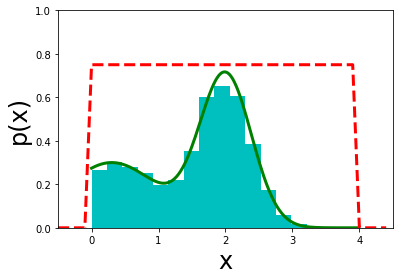

Wall time: 734 ms


In [22]:
%%time
import numpy as np
import matplotlib.pyplot as plt

def qsample():
    return np.random.rand()*4  # 使用均匀分布作为q(x)，返回采样点a， 均匀分布区间: 0-4]

def p(x):
    return 0.3 * np.exp(-(x - 0.3) ** 2) + 0.7 * np.exp(-(x - 2.) ** 2 / 0.3)  # p(z)概率分布函数

def rejection(nsamples):
    M = 0.78
    samples = np.zeros(nsamples, dtype=float)
    count = 0
    
    for i in range(nsamples):
        accept = False
        while not accept:
            # 被拒绝了，继续抽样
            x = qsample()
            u = np.random.rand() * M
            if u < p(x):
                accept = True
                samples[i] = x
            else:
                count +=1
    print("reject count: ", count)
    return samples
        
x = np.arange(0, 4, 0.01)
x2 = np.arange(-0.5, 4.5, 0.1)
realdata = 0.3 * np.exp(-(x - 0.3) ** 2) + 0.7 * np.exp(-(x - 2.) ** 2 / 0.3)
box = np.ones(len(x2)) * 0.75  # 0.8
box[:5] = 0
box[-5:] = 0
plt.plot(x, realdata, 'g', lw=3)
plt.plot(x2, box, 'r--', lw=3)

samples = rejection(10000)
plt.hist(samples, 15, density=1, fc='c')
plt.xlabel('x', fontsize=24)
plt.ylabel('p(x)', fontsize=24)
plt.axis([-0.5, 4.5, 0, 1])
plt.show()
    

在很多时候我们还是很难得到我们的概率分布的样本集。

在高维的情况下，

Rejection Sampling有两个问题：

    1.合适的q分布很难找
    2.很难确定一个合理的k值

导致拒绝率很高。



#### 4、重要性采样

上面描述了两种从另一个分布获取指定分布的采样样本的算法，

对于1.在实际工作中，一般来说我们需要sample的分布都及其复杂，不太可能求解出它的反函数，但p(x)的值也许还是可以计算的。

对于2.找到一个合适的cq(x)往往很困难，接受概率有可能会很低。

那我们回过头来看我们sample的目的：其实是想求得E[f(x)], x∼p(x),也就是:

$E(f(x)) = \int_x{f(x)}p(x)d(x)$

如果符合p(x)分布的样本不太好生成，我们可以引入另一个分布q(x)，可以很方便地生成样本。使得

$E_{p(x)}(f(x)) = \int_x{f(x)}p(x)d(x) = \int_x\frac{f(x)}{q(x)}{q(x)}p(x)d(x) = \int_xg(x)q(x)dx$

$g(x) = f(x)\frac{p(x)}{q(x)}$

其中$\frac{p(x)}{q(x)}$是Importance Weight.

根据蒙特卡洛积分公式，$E_{p(x)}(f(x)) = \frac{1}{N}\sum{f(x_i)\frac{p(x_i)}{q(x_i)}}$ 其中$x_i$是从$q(x)$中采样而来

首先当然是我们本来没办法sample from p，这个是我们看到的，

IS将之转化为了从q分布进行采样；同时IS有时候还可以改进原来的sample，比如说:

<img src="图片/重要性采样.jpg">

可以看到如果我们直接从p进行采样，而实际上这些样本对应的f(x)都很小，

采样数量有限的情况下很有可能都无法获得f(x)值较大的样本，这样评估出来的期望偏差会较大；

而如果我们找到一个q分布，使得它能在f(x)∗p(x)较大的地方采集到样本，则能更好地逼近[Ef(x)]，

因为有Importance Weight控制其比重，所以也不会导致结果出现过大偏差。

所以选择一个好的p也能帮助你sample出来的效率更高，要使得f(x)p(x)较大的地方能被sample出来。

上面我们假设g(x)和q(x)都可以比较方便地计算，但有些时候我们这个其实是很困难的，

更常见的情况市我们能够比较方便地计算$\widetilde{p}(x)$和$\widetilde{q}(x)$

$p(x)=\frac{\widetilde{p}(x)}{Z_p}$

$q(x)=\frac{\widetilde{q}(x)}{Z_q}$

其中： $Z_{p/q}$是一个标准化项（常数）

$Z_p=\int_x{\widetilde{p}(x)}dx$

$Z_q=\int_x{\widetilde{q}(x)}dx$

<img src="图片/重要性采样2.png">

最后：问题变成了：

$E(f(x)) = \sum_{i=1}^{m}\widehat{w}(x_i)*f(x_i)$ 

$x_i$服从q(x)分布

其中：$\widehat{w}(x_i) = \frac{\widetilde{w}(x_i)}{\sum_{j=1}^{m}\widetilde{w}(x_j)}$

$\color{green}{重要性采样的一个重要的应用就是在NPL中神经网络的输出层采用softmax时，对softmax进行求导时，通过is采样完成。}$

100002.93679080496 264.1078690906944
100020.08002147397 331.46211660183644
99970.46068379853 204.27549343843708
108382.15488882197 15967.968033279725
99973.87407677848 283.6971518886982
99961.79890718465 264.0790274062503


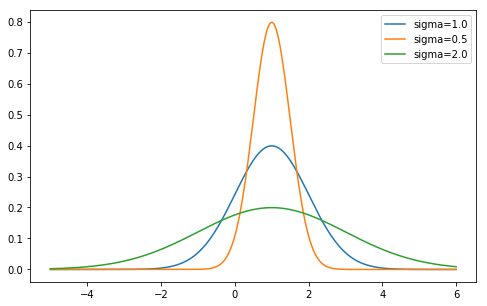

In [26]:
# 我们假设要采样的数据来自均值为1，标准差为1的高斯分布，希望用另一个高斯分布来近似这个分布。
# 我们选取三个：均值为1，标准差分别为1、0.5、2的高斯分布来进行比较。
# 为了更好地看出重要性采样的效果，这里的函数将选择一个比较简单的形式f(x)=x：

import numpy as np
import math
import matplotlib.pyplot as plt

def gaussian(x,u,sigma):    
    """
    param x:要计算概率密度值的点
    param u:均值
    param sigma:方差
    return x的概率密度值
    """
    return math.exp(-(x-u)**2/(2*sigma*sigma))/math.sqrt(2*math.pi*sigma*sigma)

def importance_sampling_test(ori_sigma,sample_sigma):
    """
    param ori_sigma:原始分布p(x)的方差
    param sample_sigma:采样分布p~(x)的方差
    return
    
    """
    origin = []
    for n in range(10):
        #进行10次计算
        Sum = 0
        for i in range(100000):
            a = np.random.normal(1.0,ori_sigma)
            Sum += a              
        origin.append(Sum)
        
    isample = []
    for n in range(10):
        Sum2 = 0
        for i in range(100000):
            a = np.random.normal(1.0,sample_sigma) #计算从正太分布采样出来的x
            ua = gaussian(a,1.0,sample_sigma)    #计算采样概率密度
            na = gaussian(a,1.0,ori_sigma)       #计算原始概率密度
            Sum2 += a*na/ua    
        isample.append(Sum2)
    
    origin = np.array(origin)
    isample = np.array(isample)
    
    print(np.mean(origin),np.std(origin))
    print(np.mean(isample),np.std(isample))
    

importance_sampling_test(1.0,1.0)
# importance_sampling_test(1.0,0.5)
# importance_sampling_test(1.0,2.0)

xs = np.linspace(-5,6,301)
y1 = [gaussian(x,1.0,1.0) for x in xs]
# y2 = [gaussian(x,1.0,0.5) for x in xs]
# y3 = [gaussian(x,1.0,2.0) for x in xs]

fig = plt.figure(figsize=(8,5))

plt.plot(xs,y1,label="sigma=1.0")
# plt.plot(xs,y2,label="sigma=0.5")
# plt.plot(xs,y3,label="sigma=2.0")
plt.legend()
plt.show()

$\color{\red}{重要性采样与reject采样不同，reject采样它是无权重的，也就是依然是f(x),只不过他是带有接受率取选择这个f（x）,
    而重要性采样没有接受率，只不过它在f（x）前面是有权重系数的}$

### 马尔科夫链

马尔科夫链定义本身比较简单，它假设某一时刻状态转移的概率只依赖于它的前一个状态。

举个形象的比喻，假如每天的天气是一个状态的话，那个今天是不是晴天只依赖于昨天的天气，而和前天的天气没有任何关系。

当然这么说可能有些武断，但是这样做可以大大简化模型的复杂度，因此马尔科夫链在很多时间序列模型中得到广泛的应用，

比如循环神经网络RNN，隐式马尔科夫模型HMM等，当然MCMC也需要它。

如果用精确的数学定义来描述，则假设我们的序列状态是
    
$X_{t−2},X_{t−1},X_t,X_{t+1}$,...，那么我们的在时刻Xt+1的状态的条件概率仅仅依赖于时刻$X_t$，即：

$P(X_{t+1}|...X_{t−2},X_{t−1},X_t)=P(X_{t+1}|X_t)$

<img src="图片/股市.png">

这个马尔科夫链是表示股市模型的，共有三种状态：牛市（Bull market）, 熊市（Bear market）和横盘（Stagnant market）。

每一个状态都以一定的概率转化到下一个状态。

比如，牛市以0.025的概率转化到横盘的状态。这个状态概率转化图可以以矩阵的形式表示。

如果我们定义矩阵阵P某一位置P(i,j)的值为P(j|i),即从状态i转化到状态j的概率，并定义牛市为状态0， 熊市为状态1, 横盘为状态2. 

这样我们得到了马尔科夫链模型的状态转移矩阵为：

$P = \left[ \begin{matrix} 0.9 & 0.075 & 0.025 \\ 0.15 & 0.8 & 0.05\\ 0.25 & 0.25 & 0.5 \end{matrix} \right]$

$\color{red}{马尔科夫链与蒙特卡洛有啥关系呢？？？}$

#### 马尔科夫状态转移矩阵的性质

仍然以上面的这个状态转移矩阵为例。假设我们当前股市的概率分布为：[0.3,0.4,0.3],即30%概率的牛市，

40%概率的熊盘与30%的横盘。然后这个状态作为序列概率分布的初始状态t0，

将其带入这个状态转移矩阵计算t1,t2,t3...的状态。代码如下：

In [5]:
import numpy as np

P = np.matrix([[0.9,0.075,0.025],[0.15,0.8,0.05],[0.25,0.25,0.5]], dtype=float)
t = np.matrix([[0.3,0.4,0.3]], dtype=float)

for i in range(1,100):
    t = t * P
    print('t',i,t)

t 1 [[0.405  0.4175 0.1775]]
t 2 [[0.4715  0.40875 0.11975]]
t 3 [[0.5156 0.3923 0.0921]]
t 4 [[0.54591  0.375535 0.078555]]
t 5 [[0.567288 0.36101  0.071702]]
t 6 [[0.5826362 0.3492801 0.0680837]]
t 7 [[0.59378552 0.34014272 0.06607176]]
t 8 [[0.60194632 0.33316603 0.06488765]]
t 9 [[0.6079485  0.32790071 0.06415079]]
t 10 [[0.61237646 0.3239544  0.06366914]]
t 11 [[0.61564926 0.32100904 0.0633417 ]]
t 12 [[0.61807111 0.31881635 0.06311253]]
t 13 [[0.61986459 0.31718655 0.06294886]]
t 14 [[0.62119333 0.3159763  0.06283037]]
t 15 [[0.62217803 0.31507813 0.06274383]]
t 16 [[0.62290791 0.31441182 0.06268027]]
t 17 [[0.62344896 0.31391762 0.06263343]]
t 18 [[0.62385006 0.31355112 0.06259882]]
t 19 [[0.62414743 0.31327936 0.06257322]]
t 20 [[0.62436789 0.31307785 0.06255426]]
t 21 [[0.62453135 0.31292843 0.06254022]]
t 22 [[0.62465253 0.31281765 0.06252982]]
t 23 [[0.62474238 0.31273552 0.0625221 ]]
t 24 [[0.624809   0.31267462 0.06251639]]
t 25 [[0.62485839 0.31262947 0.06251215]]
t 26 [[

In [6]:
# 我们看到从 t 60 开始，我们的状态的概率分布就不练了 [[0.625  0.3125 0.0625]] 

# 即62.5%的牛市，31.25%的熊市与6.25%的横盘。那么这个是巧合吗？

# 我们换一组初始状态试试！！ 

# t0 = [0.7,0.1,0.2]

In [7]:
import numpy as np

P = np.matrix([[0.9,0.075,0.025],[0.15,0.8,0.05],[0.25,0.25,0.5]], dtype=float)
t = np.matrix([[0.7,0.1,0.2]], dtype=float)

for i in range(1,100):
    t = t * P
    print('t',i,t)

t 1 [[0.695  0.1825 0.1225]]
t 2 [[0.6835  0.22875 0.08775]]
t 3 [[0.6714 0.2562 0.0724]]
t 4 [[0.66079  0.273415 0.065795]]
t 5 [[0.652172 0.28474  0.063088]]
t 6 [[0.6454378 0.2924769 0.0620853]]
t 7 [[0.64028688 0.29791068 0.06180244]]
t 8 [[0.6363954  0.30180067 0.06180393]]
t 9 [[0.63347695 0.30462117 0.06190188]]
t 10 [[0.6312979  0.30668318 0.06201892]]
t 11 [[0.62967532 0.30819862 0.06212607]]
t 12 [[0.62846909 0.30931606 0.06221485]]
t 13 [[0.6275733  0.31014174 0.06228495]]
t 14 [[0.62690847 0.31075263 0.0623389 ]]
t 15 [[0.62641525 0.31120496 0.06237979]]
t 16 [[0.62604941 0.31154006 0.06241053]]
t 17 [[0.62577811 0.31178839 0.0624335 ]]
t 18 [[0.62557693 0.31197244 0.06245062]]
t 19 [[0.62542776 0.31210888 0.06246336]]
t 20 [[0.62531716 0.31221003 0.06247282]]
t 21 [[0.62523515 0.31228501 0.06247984]]
t 22 [[0.62517435 0.31234061 0.06248505]]
t 23 [[0.62512926 0.31238182 0.06248891]]
t 24 [[0.62509584 0.31241238 0.06249178]]
t 25 [[0.62507106 0.31243504 0.0624939 ]]
t 26 [[


可以看出，尽管这次我们采用了不同初始概率分布，最终状态的概率分布趋于同一个稳定的概率分布[0.625  0.3125 0.0625] 

也就是说我们的马尔科夫链模型的状态转移矩阵收敛到的稳定概率分布与我们的初始状态概率分布无关。

这个性质不光对我们上面的状态转移矩阵有效，对于绝大多数的其他的马尔科夫链模型的状态转移矩阵也有效。同时不光是离散状态，连续状态时也成立。

　　　　同时，对于一个确定的状态转移矩阵P
    
，它的n次幂Pn在当n大于一定的值的时候也可以发现是确定的：

In [8]:
P = np.matrix([[0.9,0.075,0.025],[0.15,0.8,0.05],[0.25,0.25,0.5]], dtype=float)
for i in range(10):
    P = P*P
    print('t',i,P)

t 0 [[0.8275  0.13375 0.03875]
 [0.2675  0.66375 0.06875]
 [0.3875  0.34375 0.26875]]
t 1 [[0.73555  0.212775 0.051675]
 [0.42555  0.499975 0.074475]
 [0.51675  0.372375 0.110875]]
t 2 [[0.65828326 0.28213131 0.05958543]
 [0.56426262 0.36825403 0.06748335]
 [0.5958543  0.33741675 0.06672895]]
t 3 [[0.62803724 0.30972343 0.06223933]
 [0.61944687 0.3175772  0.06297594]
 [0.6223933  0.3148797  0.062727  ]]
t 4 [[0.62502532 0.31247685 0.06249783]
 [0.6249537  0.31254233 0.06250397]
 [0.62497828 0.31251986 0.06250186]]
t 5 [[0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]]
t 6 [[0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]]
t 7 [[0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]]
t 8 [[0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]]
t 9 [[0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]]


可以看到，状态转移矩阵最终收敛于一个稳定的分布π(x)。

$\lim_{n \to \infty}P^n = \left( \begin{array}{ccc} \pi(1)&\pi(2)&\ldots&\pi(j)&\ldots \\ \pi(1)&\pi(2)&\ldots&\pi(j)&\ldots \\ \ldots&\ldots&\ldots&\ldots&\ldots \\ \pi(1)&\pi(2)&\ldots&\pi(j)&\ldots \\ \ldots&\ldots&\ldots&\ldots&\ldots \end{array} \right)$

$\pi(j) = \sum\limits_{i=0}^{\infty}\pi(i)P_{ij}$

π是方程πP=π的唯一非负解，其中：



$\pi = [\pi(1),\pi(2),...,\pi(j),...]\;\; \sum\limits_{i=0}^{\infty}\pi(i) = 1$

    (1) 非周期的马尔科夫链：这个主要是指马尔科夫链的状态转化不是循环的，如果是循环的则永远不会收敛。幸运的是我们遇到的马尔科夫链一般都是非周期性的

    (2）任何两个状态是连通的：这个指的是从任意一个状态可以通过有限步到达其他的任意一个状态，不会出现条件概率一直为0导致不可达的情况。

    （3）马尔科夫链的状态数可以是有限的，也可以是无限的。因此可以用于连续概率分布和离散概率分布。

    （4）π通常称为马尔科夫链的平稳分布。

    状态转移矩阵就是某个随机变量的分布

#### 有个平稳分布我们就可以基于马尔科夫链采样了

现在我们可以开始采样了，首先，基于初始任意简单概率分布比如高斯分布π0(x)采样得到状态值x0，基于条件概率分布P(x|x0)采样状态值x1，一直进行下去，当状态转移进行到一定的次数时，$\color{\red}{比如到n次时，我们认为此时的采样集(xn,xn+1,xn+2,...)，这样我们的采样集就都是符合同一个分布了，也就是这个平稳分布}$ 

<img src="图片/平稳分布.png">

即是符合我们的平稳分布的对应样本集，可以用来做蒙特卡罗模拟求和了。

　　　　总结下基于马尔科夫链的采样过程：

　　　　1）输入马尔科夫链状态转移矩阵P
，设定状态转移次数阈值n1，需要的样本个数n2

　　　　2）从任意简单概率分布采样得到初始状态值x0

　　　　3）for t=0
to n1+n2−1: 从条件概率分布P(x|xt)中采样得到样本xt+1

　　　　样本集(xn1,xn1+1,...,xn1+n2−1)
即为我们需要的平稳分布对应的样本集。

如果假定我们可以得到我们需要采样样本的平稳分布所对应的马尔科夫链状态转移矩阵，那么我们就可以用马尔科夫链采样得到我们需要的样本集，进而进行蒙特卡罗模拟。但是一个重要的问题是，随意给定一个平稳分布π,如何得到它所对应的马尔科夫链状态转移矩阵P呢？这是个大问题。我们绕了一圈似乎还是没有解决任意概率分布采样样本集的问题。

#### 如果说我们把平稳分布看成是后验概率，那关键就是找到它对应的状态转移矩阵

<img src="图片/203037656.jpg">

<img src="图片/61854956.jpg">

平稳分布π(x)定理：
<img src="图片/2019-06-11_105329.png">

这样我们就有了新的思路寻找转移矩阵 P，即只要我们找到矩阵 P 使得概率分布 π(x)  满足细致平稳条件即可。

<img src="图片/2019-06-11_105558.png">

<img src="图片/2019-06-11_105804.png">

转移矩阵 Q' 满足细致平稳条件，因此马氏链 Q' 的平稳分布就是 π(x)！



我们可以得到一个非常好的结论，转移矩阵 Q' 可以通过任意一个马氏链转移矩阵 Q 乘以 α (i,j) 得到， α (i,j) 一般称为接受率，其取值范围为[0,1] ，可以理解为一个概率值，在原来的马氏链上，从状态 i 以 Q (i,j) 的概率跳转到状态 j 的时候，我们以一定的概率 α (i,j) 接受这个转移，很像前面介绍的接受-拒绝采样，那里以一个常见的分布通过一定的接受-拒绝概率得到一个不常见的分布，这里以一个常见的马氏链状态转移矩阵 Q 通过一定的接受-拒绝概率得到新的马氏链状态转移矩阵 Q'。

MCMC采样算法有一个问题，如果接受率 α (xt,x') 比较小，马氏链容易原地踏步，拒绝大量的跳转，收敛到平稳分布 π(x) 的速度很慢，有没有办法可以使 α (xt,x') 变大？

### M-H采样

M-H采样是Metropolis-Hastings采样的简称，这个算法首先由Metropolis提出，被Hastings改进，因此被称之为Metropolis-Hastings采样或M-H采样

M-H采样解决了我们上一节MCMC采样接受率过低的问题。

我们回到MCMC采样的细致平稳条件：
    
   $\pi(i)Q(i,j)\alpha(i,j) = \pi(j)Q(j,i)\alpha(j,i)$
       
我们采样效率低的原因是α(i,j)太小了，比如为0.1，而α(j,i)为0.2。即：
       
   $\pi(i)Q(i,j) * 0.5 = \pi(j)Q(j,i) * 1$
   
这时我们可以看到，如果两边同时扩大五倍，接受率提高到了0.5，但是细致平稳条件却仍然是满足的，即：
   
   $\pi(i)Q(i,j)\times 0.5 = \pi(j)Q(j,i)\times 1$
   
所以我们可以把上面公式中的 α (i,j) 和 α (j,i) 同比例放大，使得其中最大的放大到 1，这样提高了采样中的接受率，细致平稳条件也没有打破，所以可以取：
这样我们的接受率可以做如下改进，即：
   
   $\alpha(i,j) = min\{ \frac{\pi(j)Q(j,i)}{\pi(i)Q(i,j)},1\}$

通过这个微小的改造，我们就得到了可以在实际应用中使用的M-H采样算法过程如下：

<img src="图片/mh.png">

#### M-H证明

<img src="图片/mh证明.png">

下面的例子中：

我们的目标平稳分布是一个均值3，标准差2的正态分布，而选择的马尔可夫链状态转移矩阵Q(i,j)的条件转移概率是以i为均值,方差1的正态分布在位置j的值。这个例子仅仅用来让大家加深对M-H采样过程的理解。毕竟一个普通的一维正态分布用不着去用M-H采样来获得样本。

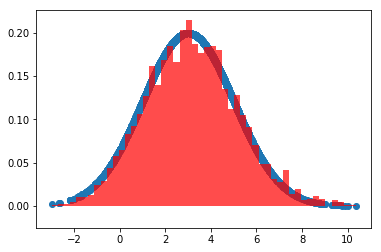

In [17]:
import random
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

def norm_dist_prob(theta):
    y = norm.pdf(theta, loc=3, scale=2)
    return y

T = 5000
pi = [0 for i in range(T)]
sigma = 1
t = 0
while t < T-1:
    t = t + 1
    pi_star = norm.rvs(loc=pi[t - 1], scale=sigma, size=1, random_state=None)  # rvs:随机变量（就是从这个分布中抽一些样本）
    alpha = min(1, (norm_dist_prob(pi_star[0]) / norm_dist_prob(pi[t - 1])))

    u = random.uniform(0, 1)
    if u < alpha:
        pi[t] = pi_star[0]
    else:
        pi[t] = pi[t - 1]


plt.scatter(pi, norm.pdf(pi, loc=3, scale=2))
num_bins = 50
plt.hist(pi, num_bins, density=1, facecolor='red', alpha=0.7)
plt.show()

### M-H方法总结

<img src="图片/mh总结.png">

 ##### 关于Q分布怎么选？？？
 
 一定要跟π有联系

### Gibbs采样

对于高维的情形，由于接受率 α ≤ 1，M-H 算法效率不够高，我们能否找到一个转移矩阵 Q 使得接受率 α =1 呢？
Gibbs采样不仅可以处理高维的联分布，而且还能$\color{\red}{并行化}$

#### Gibbs采样过程

<img src="图片/1991383615.jpg">

Gibbs算法过程：

二维Gibbs采样算法过程：
<img src="图片/2019-06-11_111025.png">
整个采样过程中，我们通过轮换坐标轴，得到样本(x0,y0),(x0,y1),(x1,y1),... ，马氏链收敛后，最终得到的样本就是 p(x,y) 的样本。当然坐标轴轮换不是必须的，我们也可以每次随机选择一个坐标轴进行采样，在  t 时刻，可以在 x 轴和 y 轴之间随机的选择一个坐标轴，然后按照条件概率做转移。

N维Gibbs采样算法过程：
<img src="图片/2019-06-11_111339.png">

整个采样过程和Lasso回归的坐标轴下降法算法非常类似，只不过Lasso回归是固定n−1个特征，对某一个特征求极值。而Gibbs采样是固定n−1

个特征在某一个特征采样。

同样的，轮换坐标轴不是必须的，我们可以随机选择某一个坐标轴进行状态转移，只不过常用的Gibbs采样的实现都是基于坐标轴轮换的。

#### Gibbs采样并行化

Gibbs是LDA的一种解法。

LDA不能用EM学习了，而需要用更generalized inference算法。学界验证效果最佳的是Gibbs sampling。作为一种Markov Chain Monte Carlo(MCMC)算法，顾名思义，Gibbs sampling是一个顺序过程，按照定义不能被并行化。

　但 是2007年的时候，UC Irvine的David Newman团队发现，对于LDA这个特定的模型，Gibbs sampling可以被并行化。具体的说，把训练数据拆分成多份，用每一份独立的训练模型。每隔几个Gibbs sampling迭代，这几个局部模型之间做一次同步，得到一个全局模型，并且用这个全局模型替换各个局部模型。这个研究发表在NIPS上，题目 是：Distributed Inference for Latent Dirichlet Allocation。

　　上述做法，在2012年Jeff Dean关于distributed deep leearning的论文中，被称为data parallelism(数据并行)。如果一个算法可以做数据并行，很可能就是可扩展(scalable)的了。

　　David Newman团队的发现允许我们用多个map tasks并行的做Gibbs sampling，然后在reduce phase中作模型的同步。这样，一个训练过程可以表述成一串MapReduce jobs。我用了一周时间在Google MapReduce框架上实现实现和验证了这个方法。后来在同事Matthew Stanton的帮助下，优化代码，提升效率。但是，因为每次启动一个MapReduce job，系统都需要重新安排进程(re-schedule);并且每个job都需要访问GFS，效率不高。在当年的Google MapReduce系统中，1/3的时间花在这些杂碎问题上了。后来实习生司宪策在Hadoop上也实现了这个方法。我印象里Hadoop环境下，杂碎事 务消耗的时间比例更大。

　　随后白红杰在我们的代码基础上修改了数据结构，使其更适合MPI的AllReduce操作。这样就得到了一个高效率的LDA实现。我们把用MapReduce和MPI实现的LDA的Gibbs sampling算法发表在这篇论文里了。

　　当 我们踌躇于MPI的扩展性不理想而MapReduce的效率不理想时，Google MapReduce团队的几个人分出去，开发了一个新的并行框架Pregel。当时Pregel项目的tech lead访问中国。这个叫Grzegorz Malewicz的波兰人说服了我尝试在Pregel框架下验证LDA。但是在说这个故事之前，我们先看看Google Rephil——另一个基于MapReduce实现的并行隐含语义分析系统。

四、Rephil和MapReduce——描述长尾数据的数学模型

　　Google Rephil是Google AdSense背后广告相关性计算的头号秘密武器。但是这个系统没有发表过论文。只是其作者(博士Uri Lerner和工程师Mike Yar)在2002年在湾区举办的几次小规模交流中简要介绍过。所以Kevin Murphy把这些内容写进了他的书《Machine Learning: a Probabilitic Perspecitve》里。在吴军博士的《数学之美》里也提到了Rephil。

　　Rephil 的模型是一个全新的模型，更像一个神经元网络。这个网络的学习过程从Web scale的文本数据中归纳海量的语义——比如“apple”这个词有多个意思：一个公司的名字、一种水果、以及其他。当一个网页里包含”apple”, “stock”, “ipad”等词汇的时候，Rephil可以告诉我们这个网页是关于apple这个公司的，而不是水果。

　　这个功能按说pLSA和LDA也都能实现。为什么需要一个全新的模型呢?

　　从 2007年至今，国内外很多团队都尝试过并行化pLSA和LDA。心灵手巧的工程师们，成功的开发出能学习数万甚至上十万语义(latent topics)的训练系统。但是不管大家用什么训练数据，都会发现，得到的大部分语义(相关的词的聚类)都是非常类似，或者说“重复”的。如果做一个“去 重”处理，几万甚至十万的语义，就只剩下几百几千了。

　　这是怎么回事?

　　如果大家尝试着把训练语料中的低频词去掉，会发现训练得到的语义和用全量数据训练得到的差不多。换句话说，pLSA和LDA模型的训练算法没有在意低频数据。

　　为什么会这样呢?因为pLSA和LDA这类概率模型的主要构造单元都是指数分布(exponential distributions)。比如pLSA假设一个文档中的语义的分布是multinomial的，每个语义中的词的分布也是multinomial 的。因为multinomial是一种典型的指数分布，这样整个模型描述的海量数据的分布，不管哪个维度上的marginalization，都是指数分 布。在LDA中也类似——因为LDA假设各个文档中的语义分布的multinomial distributions的参数是符合Dirichlet分布的，并且各个语义中的词的分布的multinomial distributions的参数也是符合Dirichlet分布的，这样整个模型是假设数据是指数分布的。

　　可 是Internet上的实际数据基本都不是指数分布的——而是长尾分布的。至于为什么是这样?可以参见2006年纽约时报排名畅销书The Long Tail: Why the Future of Business is Selling Less of More。或者看看其作者Chris Anderson的博客The Long Tail。

　　长尾分布的形状大致如下图所示：
这里写图片描述
　　
wangyi-2638202712

　　其中x轴表示数据的类型，y轴是各种类型的频率，少数类型的频率很高(称为大头，图中红色部分)，大部分很低，但是大于0(称为长尾，图中黄色部分)。一个典型的例子是文章中词的分布，有个具体的名字Zipf’slaw，就是典型的长尾分布。而指数分布基本就只有大头部分——换句话说，如果我们假设长尾数据是指数分布的，我们实际上就把尾巴给割掉了。

　　割掉数据的尾巴——这就是pLSA和LDA这样的模型做的——那条长尾巴覆盖的多种多样的数据类型，就是Internet上的人生百态。理解这样的百态是很重要的。比如百度和Google为什么能如此赚钱?因为互联网广告收益。传统广告行业，只有有钱的大企业才有财力联系广告代理公司，一帮西装革履的高富帅聚在一起讨论，竞争电视或者纸媒体上的广告机会。互联网广告里，任何人都可以登录到一个网站上去投放广告，即使每日广告预算只有几十块人民币。这样一来，刘备这样织席贩屡的小业主，也能推销自己做的席子和鞋子。而搜索引擎用户的兴趣也是百花齐放的——从人人爱戴的陈老师苍老师到各种小众需求包括“红酒木瓜汤”(一种丰胸秘方，应该出丰胸广告)或者“苹果大尺度”(在搜索范冰冰主演的《苹果》电影呢)。把各种需求和各种广告通过智能技术匹配起来，就酝酿了互联网广告的革命性力量。这其中，理解各种小众需求、长尾意图就非常重要了。

　　实际上，Rephil就是这样一个能理解百态的模型。因为它把GoogleAdSense的盈利能力大幅提升，最终达到Google收入的一半。两位作者荣获Google的多次大奖，包括Founders’Award。

　　而切掉长尾是一个很糟糕的做法。大家还记得小说《1984》里有这样一个情节吗?老大哥要求发布“新话”——一种新的语言，删掉自然英语中大部分词汇，只留下那些主流的词汇。看看小说里的人们生活的世界，让人浑身发毛，咱们就能体会“割尾巴”的恶果了。没有看过《1984》的朋友可以想象一下水木首页上只有“全站十大”，连“分类十大”都删掉之后的样子。

　　既 然如此，为什么这类模型还要假设数据是指数分布的呢?——实在是不得已。指数分布是一种数值计算上非常方便的数学元素。拿LDA来说，它利用了 Dirichlet和multinomial两种分布的共轭性，使得其计算过程中，模型的参数都被积分给积掉了(integrated out)。这是AD-LDA这样的ad hoc并行算法——在其他模型上都不好使的做法——在LDA上好用的原因之一。换句话说，这是为了计算方便，掩耳盗铃地假设数据是指数分布的。

　　实际上，这种掩耳盗铃在机器学习领域很普遍。比如有个兄弟听了上面的故事后说：“那我们就别用概率模型做语义分析了，咱们还用矩阵分解吧?SVD分解怎么 样?” 很不好意思的，当我们把SVD分解用在语义分析(称为LSA，latent semantic analysis)上的时候，我们还是引入了指数分布假设——Gaussian assumption或者叫normality assumption。这怎么可能呢?SVD不就是个矩阵分解方法吗?确实传统SVD没有对数据分布的假设，但是当我们用EM之类的算法解决存在 missing data的问题——比如LSA，还有推荐系统里的协同过滤(collaborative filtering)——这时不仅引入了Gaussian assumption，而且引入了linearity assumption。当我们用其他很多矩阵分解方法做，都存在同样的 问题。

　　掩耳盗铃的做法怎么能存在得如此自然呢?这是因为指数分布假设(尤其是Gaussian assumption)有过很多成功的应用，包括通信、数据压缩、制导系统等。这些应用里，我们关注的就是数据中的低频部分;而高频部分(或者说距离 mean比较远的数据)即使丢掉了，电话里的声音也能听懂，压缩还原的图像也看得明白，导弹也还是能沿着“最可能”靠谱的路线飞行。我们当然会假设数据是 指数分布的，这样不仅省计算开销，而且自然的忽略高频数据，我们还鄙夷地称之为outlier或者noise。

　　可是在互联网的世界里，正是这些五花八门的outliers和noise，蕴含了世间百态，让数据不可压缩，从而产生了“大数据”这么个概念。处理好大数据 的公司，赚得盆满钵满，塑造了一个个传奇。这里有一个听起来比较极端的说法大数据里无噪声——很多一开始频率很低，相当长尾，会被词过滤系统认为是拼写错 误的queries，都能后来居上成为主流。比如“神马”，“酱紫”。

　　Rephil 系统实现的模型是一个神经元网络模型(neural network)。它的设计的主要考虑，就是要能尽量好的描述长尾分布的文本数据和其中蕴含的语义。Rephil模型的具体技术细节因为没有在论文中发表 过，所以不便在这里透露。但是Rephil模型描述长尾数据的能力，是下文将要介绍的Peacock系统的原动力，虽然两者在模型上完全不同。

　　Rephil 系统是基于Google MapReduce构建的。如上节所述，MapReduce在用来实现迭代算法的时候，效率是比较低的。这也是Peacock要设计全新框架的原动力—— 使其比MapReduce高效，但同时像MapReduce一样支持fault recovery。

### 腾讯的peacock

### sparkLDAGibbs